### 暖身

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_tset = pd.DataFrame(np.arange(36).reshape(4,9),columns=['臨','兵','鬥','者','皆','陣','列','在','前'],index=['奇','門','遁','甲'])
df_tset

In [ ]:
df_tset['test'] = df_tset['前'].apply(pd.to_datetime)
df_tset

In [ ]:
df_tset.drop('test',axis=1)

### 資料匯入

### 資料觀察（視覺化）

### 特徵工程 Feature Engineering

### 模型建制

### 模型驗證

### dataframe.corr()用法及代碼示例

In [ ]:
import pandas as pd
df = pd.read_csv('data/DIY_data_test.csv')
df.head(1)

,IsSuperMan,hight,MyFriend(90%),sex,HaveHome(10%),HaveWife(0%),LoveRiver(50%),LoveSea(40%),weight,age,unknow,unknow2
0,Y,150,Y,122.8,Y,N,Y,N,40,18,0.2419,0.07871


In [ ]:
df['IsSuperMan'] = df['IsSuperMan'].replace({'Y': 0, 'N': 1})
df['MyFriend(90%)'] = df['MyFriend(90%)'].replace({'Y': 0, 'N': 1})
df['HaveHome(10%)'] = df['HaveHome(10%)'].replace({'Y': 0, 'N': 1})
df['HaveWife(0%)'] = df['HaveWife(0%)'].replace({'Y': 0, 'N': 1})
df['LoveRiver(50%)'] = df['LoveRiver(50%)'].replace({'Y': 0, 'N': 1})
df['LoveSea(40%)'] = df['LoveSea(40%)'].replace({'Y': 0, 'N': 1})

In [ ]:
df.corr(method ='pearson') # 預設的

,IsSuperMan,hight,MyFriend(90%),sex,HaveHome(10%),HaveWife(0%),LoveRiver(50%),LoveSea(40%),weight,age,unknow,unknow2
IsSuperMan,1.000000,-0.106819,0.860753,-0.014950,-0.767193,-1.000000,0.017471,-0.150325,0.212754,0.464641,-0.020836,-0.049518
hight,-0.106819,1.000000,-0.099315,-0.148911,0.177252,0.106819,0.053330,0.106756,0.011706,-0.069101,-0.237649,-0.081028
MyFriend(90%),0.860753,-0.099315,1.000000,-0.059784,-0.632353,-0.860753,0.058356,-0.111192,0.159413,0.302232,0.042773,0.151818
sex,-0.014950,-0.148911,-0.059784,1.000000,-0.093586,0.014950,0.004333,0.071546,-0.205870,0.173999,0.090700,-0.318997
HaveHome(10%),-0.767193,0.177252,-0.632353,-0.093586,1.000000,0.767193,0.113280,0.198060,-0.038326,-0.308843,-0.017363,0.033849
HaveWife(0%),-1.000000,0.106819,-0.860753,0.014950,0.767193,1.000000,-0.017471,0.150325,-0.212754,-0.464641,0.020836,0.049518
LoveRiver(50%),0.017471,0.053330,0.058356,0.004333,0.113280,-0.017471,1.000000,0.804601,0.024971,-0.000494,0.070385,0.069241
LoveSea(40%),-0.150325,0.106756,-0.111192,0.071546,0.198060,0.150325,0.804601,1.000000,-0.095435,-0.084782,0.112073,0.141405
weight,0.212754,0.011706,0.159413,-0.205870,-0.038326,-0.212754,0.024971,-0.095435,1.000000,0.539593,-0.069093,-0.196256
age,0.464641,-0.069101,0.302232,0.173999,-0.308843,-0.464641,-0.000494,-0.084782,0.539593,1.000000,0.185388,0.007766


In [ ]:
df.corr(method ='kendall')

In [ ]:
df.corr(method ='spearman')

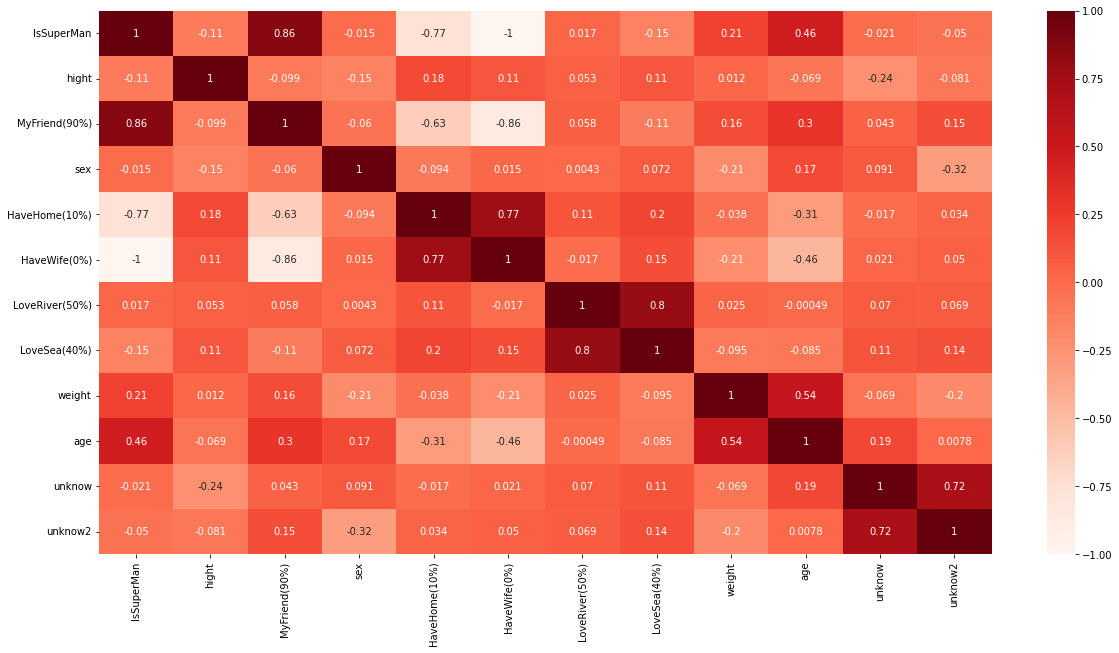

In [ ]:
# 以 Heatmap 呈現 Feature 之間的相關係數
import matplotlib as plt
import seaborn as sns #簡易版matplotlib
featuresCorr = df.corr() #查找數據中所有列的成對相關性。任何na值、非數字數字欄位將忽略
plt.pyplot.figure(figsize=(20,10))
sns.heatmap(featuresCorr, annot=True, cmap=plt.cm.Reds, vmax=1, vmin=-1) # vmin,vmax:显示的数据值的最大和最小的范围
# annot:如果为True，则将数据值写入每个单元格中
plt.pyplot.show()

### PCA

### 特徵選擇——卡方檢驗
#### 看自變數對因變數的相關性
##### PS : 和我用.corr有異曲同工之妙?!

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import load_iris

#匯入IRIS資料集
iris = load_iris()
print(iris.data.shape)
iris.data

In [ ]:
iris.target

In [ ]:
# 使用卡方檢驗來選擇特徵
model1 = SelectKBest(chi2, k=2)#選擇k個最佳特徵
model1.fit_transform(iris.data, iris.target)#iris.data是特徵資料，iris.target是標籤資料，該函式可以選擇出k個特徵 

In [ ]:
# 可以看出後使用卡方檢驗，選擇出了後兩個特徵。如果我們還想檢視卡方檢驗的p值和得分，可以檢視p-values和scores
model1.scores_  #得分,可以看出後兩個特徵得分最高，與我們第二步的結果一致

In [ ]:
model1.pvalues_  #p-values,可以看出後兩個特徵的p值最小，置信度也最高，與前面的結果一致

In [ ]:
df_mine = pd.read_csv('data/DIY_data_test.csv')
df_mine.head()

In [ ]:
df_mine['IsSuperMan'] = df_mine['IsSuperMan'].replace({'Y': 0, 'N': 1})
df_mine['myFriend'] = df_mine['myFriend'].replace({'Y': 0, 'N': 1})
df_mine['haveHome'] = df_mine['haveHome'].replace({'Y': 0, 'N': 1})
df_mine['haveWife'] = df_mine['haveWife'].replace({'Y': 0, 'N': 1})
df_mine['loveRiver'] = df_mine['loveRiver'].replace({'Y': 0, 'N': 1})

In [ ]:
df_mine.head()

In [ ]:
target = df_mine['IsSuperMan'].to_numpy()
target

In [ ]:
data = df_mine.drop(['IsSuperMan'],axis=1).to_numpy()
data

In [ ]:
# 使用卡方檢驗來選擇特徵
model1 = SelectKBest(chi2, k=5)#選擇k個最佳特徵
model1.fit_transform(data, target)

In [ ]:
model1.scores_

In [ ]:
model1.pvalues_

### 特徵選取的三種方法：Filter、Wrapper、Embedded

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('data/data.csv')
data.head(2)

In [ ]:
data.columns

In [ ]:
data.groupby('diagnosis').size() 
# data['diagnosis'].value_counts() # 效果一樣

In [ ]:
# test
print(type(np.arange(5)))
print(type(data.iloc[0,0]))
print(data.shape)

In [ ]:
# 還沒有加入 Feature selection 之前的 SVM
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
data['diagnosis'] = data['diagnosis'].replace({'M': 0, 'B': 1})
y = data['diagnosis']
X = data.drop(['id'] ,axis = 1)
X = X.drop(['Unnamed: 32'] ,axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# SVM with all features
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [ ]:
predictions

In [ ]:
# 以 Heatmap 呈現 Feature 之間的相關係數
import matplotlib as plt
import seaborn as sns #簡易版matplotlib
df = pd.DataFrame(X, columns = X.columns)
featuresCorr = df.corr() #查找數據中所有列的成對相關性。任何na值、非數字數字欄位將忽略
plt.pyplot.figure(figsize=(20,10))
sns.heatmap(featuresCorr, annot=True, cmap=plt.cm.Reds, vmax=1, vmin=-1) # vmin,vmax:显示的数据值的最大和最小的范围
# annot:如果为True，则将数据值写入每个单元格中
plt.pyplot.show()

In [ ]:
# 找出與 Target 相關係數 >0.5 或是< -0.5 的 Feature
targetCorr = abs(featuresCorr['diagnosis'])
targetCorr = targetCorr.drop('diagnosis')
selectedFeatures = targetCorr[targetCorr>0.5]
print(f"Number of selected features: {len(selectedFeatures)} \n\nHighly relative feature list:\n{selectedFeatures}")

In [ ]:
# 從原本用 30 Feature 變成使用 15 個 Feature 去預測 Target，可以用 sklearn 提供的方法 ex: confusion_matrix、score… 評估模型的好壞
# SVM with selected features
selectedX_train = X_train[list(selectedFeatures.keys())]
selectedX_test = X_test[list(selectedFeatures.keys())]
selectedClf = sklearn.svm.SVC(kernel='linear')
selectedClf.fit(selectedX_train, y_train)
selectedPredictions = selectedClf.predict(selectedX_test)

In [ ]:
# chi2 卡方檢定
# SVM with Univariate feature selection, chi2
chi2Filter = SelectKBest(chi2, k=10)
ufsClf = SVC(kernel='linear')
ufsSvm = make_pipeline(chi2Filter, ufsClf)
ufsSvm.fit(X_train, y_train)
ufsPredictions = ufsSvm.predict(X_test)
selectedFeatureIndices = chi2Filter.get_support(indices=True)
selectedFeatureColNames = X_train.columns[selectedFeatureIndices]
print(f"Selected feature list: {selectedFeatureColNames}")

In [ ]:
# ANOVA, Analysis of variance 變異數分析
# SVM with ANOVA
fvalueFilter = SelectKBest(f_classif, k=10)
anovaClf = SVC(kernel='linear')
anovaSvm = make_pipeline(fvalueFilter, anovaClf)
anovaSvm.fit(X_train, y_train)
anovaPredictions = anovaSvm.predict(X_test)
selectedFeatureIndices = fvalueFilter.get_support(indices=True)
selectedFeatureColNames = X_train.columns[selectedFeatureIndices]
print(f"Selected feature list:\n{selectedFeatureColNames}")